In [ ]:
a = 0
while(True):
    a += 1
    print(a)

In [1]:
from rdkit import Chem
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as ptl
import seaborn as sns
import sys, os
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.Chem.QED import properties

import subprocess
import threading
import queue
import os
sys.path.append("../module/")
from lipinski import *

In [2]:
smiles = 'Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1'

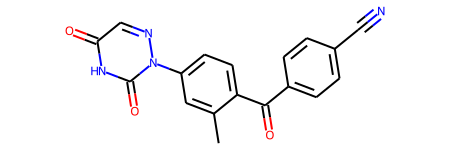

In [3]:
Chem.MolFromSmiles(smiles)

In [34]:
con = sqlite3.connect('../data/dados_att/dados_atualizados_19.db')
con2 = sqlite3.connect('../data/dados_att/dados_atualizados_1.db')

In [35]:
dataframe = pd.read_sql('select * from dados', con)
#dataframe = pd.read_csv('inibidores_encontrados.csv')

DatabaseError: Execution failed on sql 'select * from dados': no such table: dados

In [36]:
dat = pd.read_sql('select * from dados', con2)

In [37]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL7253,276.719,3.6427,46.53,4.0,4.18,NaN,3.70,0.66,ACID,276.72,2.0,19.0,0.93,276.0553,2.0,1.0,0.0000,COc1ccc(-c2ccc(Cl)cc2)c(CC(=O)O)c1
1,CHEMBL7252,308.333,3.6096,67.51,4.0,5.63,NaN,3.52,1.75,ACID,308.33,3.0,23.0,0.80,308.1049,4.0,1.0,0.0000,CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O
2,CHEMBL414400,323.132,0.9090,112.70,6.0,8.69,NaN,0.88,0.86,NEUTRAL,323.13,1.0,20.0,0.41,322.0123,5.0,3.0,0.0000,O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl
3,CHEMBL268072,255.745,1.8679,44.48,2.0,NaN,9.92,1.57,-0.84,BASE,255.74,3.0,16.0,0.82,219.1259,3.0,1.0,0.0000,C[C@@H](N)Cc1c2c(cc3c1OCC3)OCC2.Cl
4,CHEMBL268542,323.742,2.8867,44.48,2.0,NaN,9.91,2.45,0.05,BASE,323.74,3.0,20.0,0.91,287.1133,3.0,1.0,0.0000,C[C@H](N)Cc1c2c(c(C(F)(F)F)c3c1OCC3)OCC2.Cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,CHEMBL20266,459.421,5.4104,58.95,8.0,NaN,10.01,4.82,2.29,BASE,459.42,4.0,31.0,0.44,458.1640,4.0,2.0,1.0000,O=C(NCCCCCn1c(C2CCNCC2)nc2cc(Cl)c(Cl)cc21)c1cc...
1460,CHEMBL277242,347.054,2.9971,27.63,2.0,NaN,8.66,3.34,2.09,BASE,347.05,2.0,16.0,0.89,344.9476,3.0,1.0,0.0000,CCN(C1=NCCN1)c1c(Br)cccc1Br
1461,CHEMBL20335,361.081,3.3872,27.63,3.0,NaN,8.72,3.86,2.56,BASE,361.08,2.0,17.0,0.89,358.9633,3.0,1.0,0.0000,CCCN(C1=NCCN1)c1c(Br)cccc1Br
1462,CHEMBL20103,518.526,3.5339,136.61,7.0,NaN,4.41,2.37,2.37,NEUTRAL,518.53,5.0,38.0,0.37,518.1801,11.0,1.0,2.0000,COC(=O)[C@@H]1C(/C=N/c2cncnc2N)=Cc2cc3c(cc2C1c...


In [33]:
dat

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL7266,364.590,3.5356,82.24,1.0,NaN,0.58,3.81,3.81,NEUTRAL,364.59,4.0,21.0,0.56,362.9522,6.0,1.0,0.0000,Nc1nc2ccc(Cl)cc2c2nc(-c3ccc(Br)o3)nn12
1,CHEMBL269064,315.123,0.5075,109.49,5.0,2.74,NaN,0.41,-3.08,ACID,315.12,1.0,18.0,0.74,313.9902,3.0,3.0,0.0000,NC(=O)C[C@H](NC(=O)c1ccccc1Br)C(=O)O
2,CHEMBL449,212.249,0.7949,75.27,3.0,7.48,NaN,1.45,1.19,NEUTRAL,212.25,1.0,15.0,0.68,212.1161,3.0,2.0,0.0000,CCC(C)C1(CC)C(=O)NC(=O)NC1=O
3,CHEMBL267653,398.256,4.0280,66.40,5.0,3.27,NaN,4.51,1.08,ACID,398.26,3.0,25.0,0.68,397.0314,2.0,2.0,0.0000,O=C(N[C@H](Cc1cccc2ccccc12)C(=O)O)c1ccccc1Br
4,CHEMBL7333,252.310,3.1970,67.51,7.0,6.72,NaN,3.39,2.63,NEUTRAL,252.31,1.0,18.0,0.60,252.1362,4.0,1.0,0.0000,CCCCCCCC(=O)c1c(O)cc(C)oc1=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,CHEMBL22040,471.815,7.4678,27.05,7.0,NaN,6.42,7.47,7.44,NEUTRAL,471.82,4.0,31.0,0.28,470.0719,3.0,0.0,1.0000,COc1ccc(C(C(Cc2ccc(Cl)cc2Cl)c2ccc(Cl)cc2)n2ccn...
1460,CHEMBL277949,513.016,7.1073,50.16,6.0,NaN,9.33,6.53,4.60,BASE,513.02,5.0,37.0,0.26,512.1779,4.0,1.0,2.0000,Cc1cc(C(=O)Nc2ccc(-c3ccccc3CN(C)C)cc2F)n(-c2cc...
1461,CHEMBL20719,260.381,2.1121,26.71,2.0,NaN,8.72,2.65,1.32,BASE,260.38,3.0,19.0,0.88,260.1889,3.0,1.0,0.0000,OC1CCCCC1N1CCN(c2ccccc2)CC1
1462,CHEMBL20664,274.408,2.5006,26.71,2.0,NaN,9.02,3.07,1.44,BASE,274.41,3.0,20.0,0.90,274.2045,3.0,1.0,0.0000,CC1CN(C2CCCCC2O)CCN1c1ccccc1


In [18]:
b = dataframe.copy()

In [24]:
id(dataframe.chembl_id) == id(b.chembl_id)

False

In [10]:
b.loc[b.chembl_id == "CHEMBL31000"]

,Unnamed: 0,molregno,chembl_id,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,grupos,grupos_cluster_knn
0,7,43896,CHEMBL31000,222.68,2.29,3.0,2.0,45.15,3.0,NaN,...,0.84,222.056,C11H11ClN2O,3.0,2.0,0,0,1,0,0


In [6]:
dataframe = dataframe.drop(['cx_most_apka', 'cx_most_bpka', 'molecular_species', 'cx_logp', 'cx_logd', 'heavy_atoms', 'qed_weighted'], axis=1)

In [7]:
dataframe.loc[dataframe.isnull().any(axis=1)].sort_values(by='psa')

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
121,CHEMBL383864,1081.39,NaN,NaN,NaN,1081.39,NaN,1080.6498,NaN,NaN,NaN,COCCc1ccc(OCC(O)CN(CC(O)COc2ccc(CCOC)cc2)C(C)C...
212,CHEMBL266306,1574.97,NaN,NaN,NaN,1574.97,NaN,1573.7792,NaN,NaN,NaN,CC(C)[C@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](...
213,CHEMBL385851,1070.15,NaN,NaN,NaN,1070.15,NaN,1069.4611,NaN,NaN,NaN,CC(C)[C@@H]1NC(=O)CNC(=O)[C@H](CO)NC(=O)[C@@H]...
346,CHEMBL439178,1958.13,NaN,NaN,NaN,1958.13,NaN,1956.8775,NaN,NaN,NaN,CCCN(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H]...
352,CHEMBL414772,1916.10,NaN,NaN,NaN,1916.10,NaN,1914.8669,NaN,NaN,NaN,CCCN(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H]...
...,...,...,...,...,...,...,...,...,...,...,...,...
9881,CHEMBL439090,2453.90,NaN,NaN,NaN,2453.90,NaN,2452.0030,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...
9882,CHEMBL411371,2530.00,NaN,NaN,NaN,2530.00,NaN,2528.0343,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...
9889,CHEMBL382683,2481.95,NaN,NaN,NaN,2481.95,NaN,2480.0343,NaN,NaN,NaN,CCC[C@@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O)O)NC(...
9890,CHEMBL440254,2515.97,NaN,NaN,NaN,2515.97,NaN,2514.0187,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...


In [8]:
ids_com_nan = dataframe.loc[dataframe.isnull().any(axis=1)][['chembl_id', 'canonical_smiles']]

In [24]:
dataframe.query('chembl_id == 'CHEMBL266306'')

SyntaxError: invalid syntax (3203176398.py, line 1)

In [28]:
dataframe= dataframe.drop(dataframe.iloc[:,0:1], axis=1)

In [43]:
dataframe[dataframe[dataframe.columns[0]] == "exist"]

,molregno,chembl_id,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,cx_most_bpka,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,grupos,grupos_cluster_knn


In [30]:
teste = dataframe.columns

In [39]:
teste[0]

'molregno'

In [11]:
quantidades = 1 
threads_num = 20
for i in range(quantidades):
    print(f"Parte {i + 1} de {quantidades}")
    tamanho_ini = int(i * len(ids_com_nan)/quantidades)
    tamanho_fim = int((i + 1) * len(ids_com_nan)/quantidades)
    atualiza_data_frame_com_lipinski(ids_com_nan, dataframe, threads_num)


Parte 1 de 1


In [12]:
dataframe.loc[dataframe.isnull().any(axis=1)].sort_values(by='psa')

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
121,CHEMBL383864,1081.395,5.7094,188.93,44.0,1081.39,4.0,1080.6498,17.0,4.0,NaN,COCCc1ccc(OCC(O)CN(CC(O)COc2ccc(CCOC)cc2)C(C)C...
212,CHEMBL266306,1574.970,NaN,NaN,NaN,1574.97,NaN,1573.7792,NaN,25.0,3.0000,CC(C)[C@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](...


In [13]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL6329,341.75,2.11,84.82,3.0,341.75,3.0,341.0567,6.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,CHEMBL6328,332.32,1.33,108.61,3.0,332.32,3.0,332.0909,7.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,CHEMBL265667,357.80,2.27,87.98,3.0,357.80,3.0,357.0880,6.0,2.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,CHEMBL6362,307.31,1.46,84.82,3.0,307.31,3.0,307.0957,6.0,1.0,0.0,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,CHEMBL267864,341.75,2.11,84.82,3.0,341.75,3.0,341.0567,6.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHEMBL430323,548.49,6.65,96.61,6.0,548.49,3.0,547.0987,6.0,2.0,2.0,O=c1c2c(oc(O)c1C(c1cccc(NS(=O)(=O)c3ccc(Cl)c(C...
9996,CHEMBL16377,360.37,4.19,91.56,3.0,360.37,4.0,360.1110,6.0,3.0,0.0,CC(=O)c1c(O)n(O)c2cc(NC(=O)c3ccc4ccccc4c3)ccc12
9997,CHEMBL16561,292.32,2.23,88.52,4.0,353.40,2.0,292.0518,6.0,2.0,0.0,CCOc1ccc(-c2csc(NC(=O)C(=O)O)n2)cc1.NCCO
9998,CHEMBL16562,320.37,2.71,77.52,5.0,320.37,2.0,320.0831,6.0,1.0,0.0,CCOC(=O)C(=O)Nc1nc(-c2ccc(OCC)cc2)cs1


In [14]:
con_2 = sqlite3.connect('data_teste.db')

In [15]:
#leitura.to_sql("data",con_2,if_exists='replace')

In [16]:
#leitura